<a href="https://colab.research.google.com/github/vogiahuan352/TTNT/blob/main/W4(fuzzy_logic)_24_2_2023.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [5]:
pip install scikit-fuzzy

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 994.0/994.0 KB 12.6 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for scikit-fuzzy: filename=scikit_fuzzy-0.4.2-py3-none-any.whl size=894088 sha256=d6027d5b7bece60b0636c56b1308922f39ee3707f4d316e4170ce36a8d6cc81c
  Stored in directory: /root/.cache/pip/wheels/2c/04/80/7eefb1a2de7d36aefd06432fab2a1486caf0a0596a7067391a
Successfully built scikit-fuzzy


In [6]:
import numpy as np
import skfuzzy as fuzz
import matplotlib.pyplot as plt


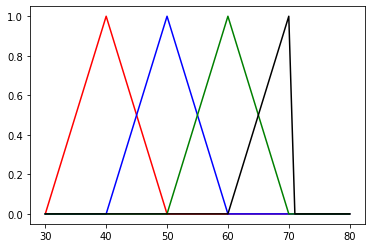

In [ ]:
x= np.arange(30, 81, 1)
slow=fuzz.trimf(x,[30, 40, 50])
medium=fuzz.trimf(x,[40,50,60])
medium_fast=fuzz.trimf(x,[50,60,70])
full_speed=fuzz.trimf(x,[60,70,70])
plt.figure()
plt.plot(x, slow, 'r',linewidth=1.5, label='slow')
plt.plot(x, medium, 'b',linewidth=1.5, label='medium')
plt.plot(x, medium_fast, 'g',linewidth=1.5, label='medium_fast')
plt.plot(x, full_speed, 'black',linewidth=1.5, label='full_speed')

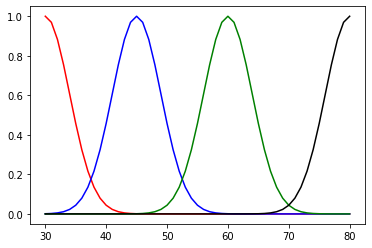

In [7]:
x= np.arange(30, 81, 1)
slow=fuzz.gaussmf(x,30, 4)
medium=fuzz.gaussmf(x,45,4)
medium_fast=fuzz.gaussmf(x,60,4)
full_speed=fuzz.gaussmf(x,80,4)
plt.figure()
plt.plot(x, slow, 'r',linewidth=1.5, label='slow')
plt.plot(x, medium, 'b',linewidth=1.5, label='medium')
plt.plot(x, medium_fast, 'g',linewidth=1.5, label='medium_fast')
plt.plot(x, full_speed, 'black',linewidth=1.5, label='full_speed')

In [8]:
import numpy as np
import skfuzzy as fuzz
from skfuzzy import control as ctrl

4.121951219512195


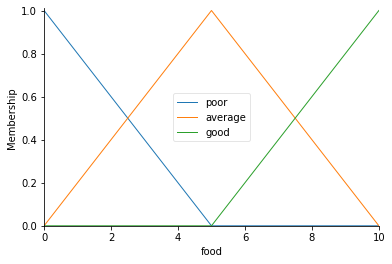

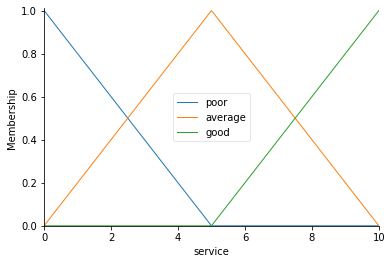

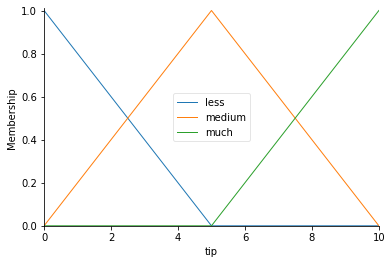

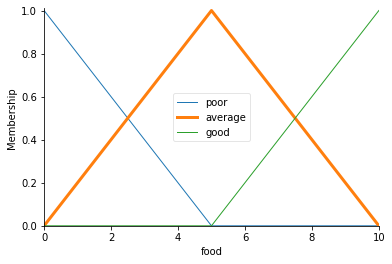

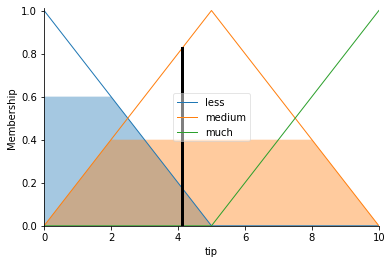

In [9]:
food=ctrl.Antecedent(np.arange(0,11,1),'food')
service=ctrl.Antecedent(np.arange(0,11,1),'service')
tip=ctrl.Consequent(np.arange(0,11,1),'tip')
food['poor']=fuzz.trimf(food.universe,[0,0,5])
food['average']=fuzz.trimf(food.universe,[0,5,10])
food['good']=fuzz.trimf(food.universe,[5,10,10])

service['poor']=fuzz.trimf(service.universe,[0,0,5])
service['average']=fuzz.trimf(service.universe,[0,5,10])
service['good']=fuzz.trimf(service.universe,[5,10,10])

tip['less']=fuzz.trimf(tip.universe,[0,0,5])
tip['medium']=fuzz.trimf(tip.universe,[0,5,10])
tip['much']=fuzz.trimf(tip.universe,[5,10,10])
food.view()
service.view()
tip.view()
food['average'].view()

rule1= ctrl.Rule(food['poor'] & service['poor'], tip['less'])
rule2= ctrl.Rule(food['poor'] & service['average'], tip['less'])
rule3= ctrl.Rule(food['poor'] & service['good'], tip['much'])
rule4= ctrl.Rule(food['average'] & service['poor'], tip['less'])
rule5= ctrl.Rule(food['average'] & service['average'], tip['medium'])
rule6= ctrl.Rule(food['average'] & service['good'], tip['much'])
rule7= ctrl.Rule(food['good'] & service['poor'], tip['medium'])
rule8= ctrl.Rule(food['good'] & service['average'], tip['much'])
rule9= ctrl.Rule(food['good'] & service['good'], tip['much'])

tipping_ctrl=ctrl.ControlSystem([rule1,rule2,rule3,rule4,rule5,rule6,rule7,rule8,rule9])
tipping=ctrl.ControlSystemSimulation(tipping_ctrl)
tipping.input['food']=3
tipping.input['service']=2
tipping.compute()
print(tipping.output['tip'])
tip.view(sim=tipping)

In [10]:
import numpy as np
import skfuzzy as fuzz
from skfuzzy import control as ctrl

30.0


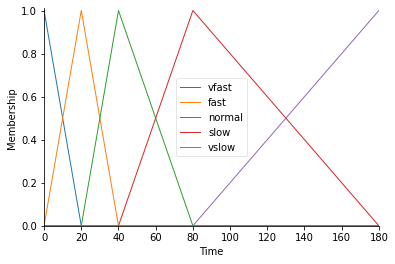

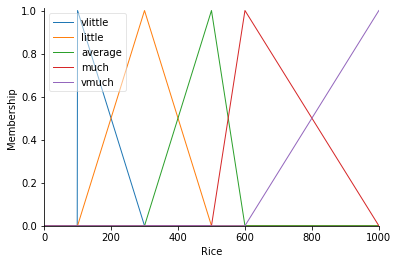

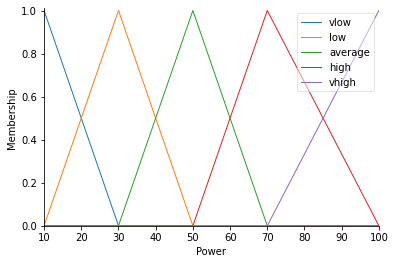

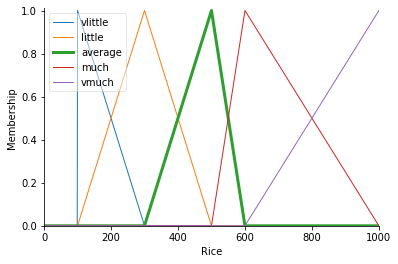

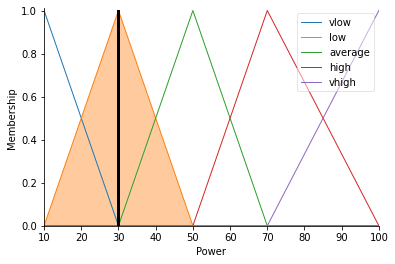

In [14]:
time = ctrl.Antecedent(np.arange(0,181,1),'Time')
rice = ctrl.Antecedent(np.arange(0,1001,1),'Rice')
power = ctrl.Consequent(np.arange(10,101,1),'Power')

time['vfast']= fuzz.trimf(time.universe,[0,0,20])
time['fast'] = fuzz.trimf(time.universe, [0,20,40])
time['normal']= fuzz.trimf(time.universe, [20,40,80])
time['slow']= fuzz.trimf(time.universe, [40,80,180])
time['vslow']= fuzz.trimf(time.universe, [80,180,180])

rice['vlittle']= fuzz.trimf(rice.universe,[100,100,300])
rice['little'] = fuzz.trimf(rice.universe, [100,300,500])
rice['average']= fuzz.trimf(rice.universe, [300,500,600])
rice['much']= fuzz.trimf(rice.universe, [500,600,1000])
rice['vmuch']= fuzz.trimf(rice.universe,[600,1000,1000])

power['vlow'] = fuzz.trimf(power.universe, [10,10,30])
power['low'] = fuzz.trimf(power.universe,[10,30,50])
power['average'] = fuzz.trimf(power.universe,[30,50,70])
power['high'] = fuzz.trimf(power.universe,[50,70,100])
power['vhigh'] = fuzz.trimf(power.universe,[70,100,100])
time.view()
rice.view()
power.view()
rice['average'].view()
rule1 = ctrl.Rule(time['vfast'] & rice['vlittle'], power['high'])
rule2 = ctrl.Rule(time['vfast'] & rice['little'], power['high'])
rule3 = ctrl.Rule(time['vfast'] & rice['average'], power['vhigh'])
rule4 = ctrl.Rule(time['vfast'] & rice['much'], power['vhigh'])
rule5 = ctrl.Rule(time['vfast'] & rice['vmuch'], power['vhigh'])

rule6 = ctrl.Rule(time['fast'] & rice['vlittle'], power['high'])
rule7 = ctrl.Rule(time['fast'] & rice['little'], power['high'])
rule8 = ctrl.Rule(time['fast'] & rice['average'], power['high'])
rule9 = ctrl.Rule(time['fast'] & rice['much'], power['vhigh'])
rule10 = ctrl.Rule(time['fast'] & rice['vmuch'],power['vhigh'])

rule11 = ctrl.Rule(time['normal'] & rice['vlittle'], power['vlow'])
rule12 = ctrl.Rule(time['normal'] & rice['little'], power['low'])
rule13 = ctrl.Rule(time['normal'] & rice['average'], power['average'])
rule14 = ctrl.Rule(time['normal'] & rice['much'], power['high'])
rule15 = ctrl.Rule(time['normal'] & rice['vmuch'], power['vhigh'])
                   
rule16 = ctrl.Rule(time['slow'] & rice['vlittle'], power['low'])
rule17 = ctrl.Rule(time['slow'] & rice['little'], power['low'])
rule18 = ctrl.Rule(time['slow'] & rice['average'], power['vlow'])
rule19 = ctrl.Rule(time['slow'] & rice['much'], power['vlow'])
rule20 = ctrl.Rule(time['slow'] & rice['vmuch'], power['vlow'])

rule21 = ctrl.Rule(time['vslow'] & rice['vlittle'], power['vlow'])
rule22 = ctrl.Rule(time['vslow'] & rice['little'], power['vlow'])
rule23 = ctrl.Rule(time['vslow'] & rice['average'], power['vlow'])
rule24 = ctrl.Rule(time['vslow'] & rice['much'], power['vlow'])
rule25 = ctrl.Rule(time['vslow'] & rice['vmuch'], power['vlow'])

cpower_ctrl = ctrl.ControlSystem([rule1, rule2, rule3, rule4, rule5, rule6, rule7, rule8, rule9, rule10, rule11, rule12, rule13, rule14, rule15, rule16, rule17, rule18, rule19, rule20, rule21, rule22, rule23, rule24, rule25])
cpower = ctrl.ControlSystemSimulation(cpower_ctrl)
cpower.input['Time'] = 40
cpower.input['Rice'] = 300
cpower.compute()
print(cpower.output['Power'])
power.view(sim = cpower)